# TP 4 : Calibration de caméra - Louis Hémadou

On note $\mathbf{x_i} = (x_i, y_i, 1)$ et $\mathbf{X_i} = (X_i, X_i, Z_i, 1)$. 
A partir de l'équation $\mathbf{x_i} \times (P\mathbf{X_i}) = 0$, on obtient:

$$ A_i p = 0$$

Avec:

$$A_i = \begin{pmatrix}
0 & -X_i & y_i X_i & 0 & -Y_i & y_i Y_i & 0 & -Z_i & y_i Z_i & 0 & -1 & y_i\\
X_i & 0 & -x_i X_i & Y_i & 0 & -x_i Y_i & Z_i & 0 & -x_i Z_i & 1 & 0 & -x_i\\
-y_i X_i & x_i X_i & 0 & -y_i Y_i & x_i Y_i & 0 &  y_i Z_i & x_i Z_i & 0 & -y_i & x_i & 0
\end{pmatrix}$$

On voit ici que $L_3 + y_i L_2 + x_i L_1 = 0$

On obtient la matrice $A$ en empilant toutes les matrices $A_i$

Multiplier une matrice carrée $n \times m$ par J à droite modifie l'ordre des colonnes : une colonne en position k se retrouve en position m-k. Multiplier une matrice carrée $n \times m$ par J à gauche modifie l'ordre des lignes : une ligne en position k se retrouve en position n-k.

Ainsi, si on note $Q_0$ et $R_0$ la décomposition QR de la matrice $J M^T J$, alors $R = J R_0 J$ et $Q = J Q_0 J$ est la décomposition RQ de M.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Récupération et séparation des données

data = np.array(np.loadtxt('data.txt'))
n = data.shape[0]
X = np.hstack((data.T[:3, :].T, np.ones((n, 1))))
x = np.hstack((data.T[3:, :].T, np.ones((n, 1))))

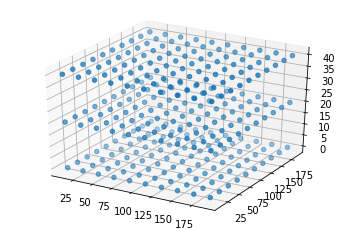

In [3]:
# Affichage des points en coordonnées 3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X.T[0], X.T[1], X.T[2])
plt.show()

In [4]:
# Création de la matrice A
A = []
for i in range(n):
    X_i = X[i][0]
    Y_i = X[i][1]
    Z_i = X[i][2]
    x_i = x[i][0]
    y_i = x[i][1]
    A.append([0, -X_i, y_i*X_i, 0, -Y_i, y_i*Y_i, 0, -Z_i, y_i*Z_i, 0, -1, y_i])
    A.append([X_i, 0, -x_i*X_i, Y_i, 0, -x_i*Y_i, Z_i, 0, -x_i*Z_i, 1, 0, -x_i])
    
A = np.array(A)

In [5]:
# On résout le système

b = - A[:, -1]
A2 = A[:, :-1]
p = np.linalg.lstsq(A2, b, rcond = None)[0]

P = np.array([[p[0], p[3], p[6], p[9]], # Matrice de projection
              [p[1], p[4], p[7], p[10]],
              [p[2], p[5], p[8], 1]])

print(P)

[[ 1.53041914e+00  3.56990733e-02  1.63852735e-01  1.08694217e+02]
 [ 5.24833474e-02  1.38230400e+00 -6.74402878e-01  8.17735107e+01]
 [-5.43271496e-06  2.61946319e-04  4.32557462e-04  1.00000000e+00]]


In [6]:
# Calcul de la matrice de calibration

M = P[:, :-1]
J = np.eye(3)[::-1]

Q0, R0 = np.linalg.qr(J@M.T@J)

Q = J@Q0@J
R = J@R0@J
K = R.T

print(K)

[[ 1.53299844e+00  3.53147955e-04 -1.42198897e-01]
 [ 0.00000000e+00 -1.53268770e+00 -1.38587574e-01]
 [ 0.00000000e+00  0.00000000e+00 -5.05718643e-04]]


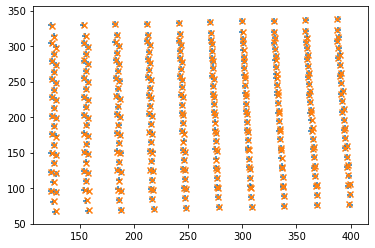

In [7]:
x_estim = X @ P.T # Points projetés calculés avec l'estimation de la matrice de projection
for i in range(len(x_estim)):
    x_estim[i] = x_estim[i] / x_estim[i, 2]
    
plt.figure()
plt.scatter(x.T[0], x.T[1], marker = "+")
plt.scatter(x_estim.T[0], x_estim.T[1], marker = "x")
plt.show()